# Study of a recalcitrant user

The objective of this study is to determine the influence of an user who wouldn't participate in the talks of the DMPC. 

For the sake of the simplicity we focus on the static model. We consider the following problem.

-- Sylvain Chatel, July 2016 --

In [1]:
from __future__ import division, print_function
import StaticOptimization as SO
from cvxopt import matrix, solvers
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
from tempfile import TemporaryFile
%matplotlib inline

/Users/sylvainchatel/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Problem definition

In [2]:
# number of users
m = 3
# vector of users
i = np.arange(m)
# max energy in kW
Umax = 2
# max admissible energy
u_m = np.array([2, 2, 2], dtype=float)
# Thermal parameters
    ## thermal resistance
Rth =np.array([10, 10, 10])
    ## Exterior temperature
Text = 10
    ## Ideal temperature in degrees
T_id = np.array([21, 21, 21], dtype=float)
# Ideal energy
deltaT = (T_id - Text)
# comfort factor
alpha = np.asarray([10, 10, 10], dtype=float)

## Verifications
assert len(alpha) == m, "illegal number of alpha. Expecting %s. and received %s." % (m, len(alpha))
assert len(T_id) == m, "illegal number of users. Expecting %s. and received %s." % (m, len(T_id))
assert len(u_m) == m, "illegal number of users. Expecting %s. and received %s." % (m, len(u_m))


pb = dict(Rth=Rth, Text=Text, T_id=T_id, Umax=Umax, u_m=u_m, alpha=alpha)

## If the user don't take into account the multiplier

break at 214.


(<matplotlib.figure.Figure at 0x10cd1bf90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10cd2dbd0>)

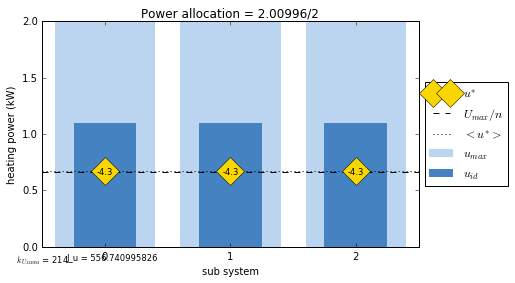

In [3]:
u_sol= SO.optim_decen(pb, 15, 1.0e-2)
SO.plot_sol(pb, u_sol)

(<matplotlib.figure.Figure at 0x10cdfc9d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10f61e890>)

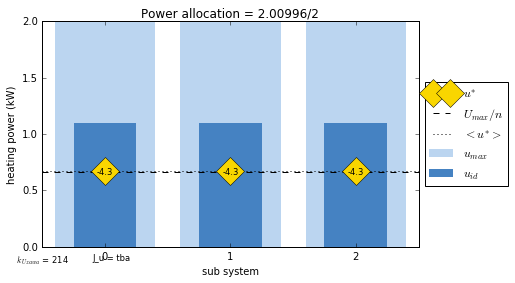

In [4]:
u_sol_d = SO.optim_CHT_decen(pb, 15, 1.0e-2, 1)
SO.plot_sol(pb, u_sol_d)

With no surprise, when facing a recalcitrant user, all the other users are disadvantaged.

## If the user softens the multiplier

In SO.optim_CHT_decen, we can set the percentage of the multiplier taken into account. By default this value is set at 0.

(-1, 2.5)

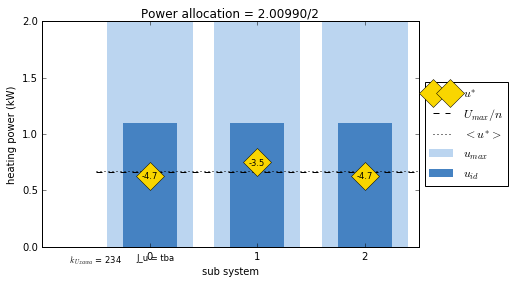

In [5]:
u_sol_d = SO.optim_CHT_decen(pb, 15, 1.0e-2, 1, 0.25)
SO.plot_sol(pb, u_sol_d)
plt.xlim(xmin=-1)

We can plot the $\Delta T$ in function of the percentage of Lagrangian multiplier taken into account.

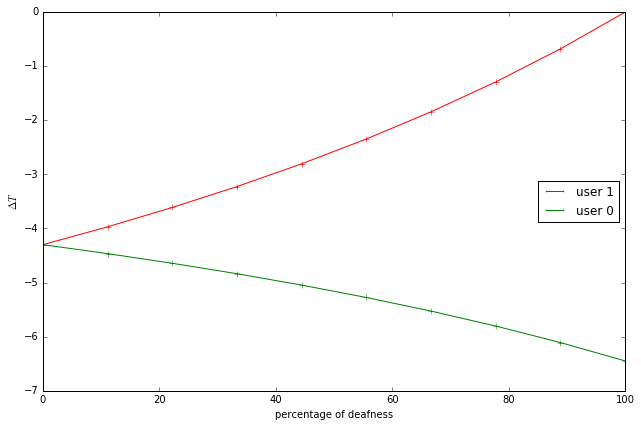

array([-4.30012028, -3.97017631, -3.6132998 , -3.22631175, -2.80631421,
       -2.34772791, -1.84580522, -1.29357661, -0.68316544, -0.0050001 ])

In [6]:
SO.param_mult(pb, 10, 15, 1.0e-2, 1)

*Note that user 1 is the cheater.*

# Conclusion

As expected, the less the Lagrangian multiplier is taken into account by the user, the more he is close to his ideal temperature. Hence, one can easily cheat the DMPC by not taking into account the result of each talk i.e. the Lagrangian multiplier. 